# Geometric Brownian Motion (GBM)

**Geometric Brownian Motion (GBM)** is a stochastic process widely used in finance to model stock prices and other asset dynamics. It assumes continuous compounding and multiplicative noise, making it suitable for assets that cannot go negative.

The GBM is defined by the stochastic differential equation (SDE):

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

Where:
- $ S_t $: Asset price at time $ t $
- $ \mu $: Mean of the stock return (drift)
- $ \sigma $: Standsrd deviation
- $ dW_t $: Increment of standard Brownian motion

It has a closed-form solution:

$$
S_t = S_0 \cdot \exp\left[\left(\mu - \frac{1}{2} \sigma^2\right)t + \sigma W_t\right]
$$

We'll now compare two methods of simulating GBM:
1. Discrete approximation solution:
$$
S[i+1] = S[i] \cdot [\left(1 + \mu \cdot dt + \sigma \cdot dW_t)\right]
$$
2. Exact solution (using the closed-form expression):
$$
S_t+dt = S_t \cdot \exp\left[\left(\mu - \frac{1}{2} \sigma^2\right) \cdot dt + \sigma \cdot dW_t \right]
$$
Here we define:
$$
t = 0;   
S(0) = 100;  
\mu = 0.05;   
\sigma = 0.2
$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100
mu = 0.05
sigma = 0.2
T = 1
N = 1000
dt = T / N
t = np.linspace(0, T, N + 1)

np.random.seed(10)
Z = np.random.normal(0, 1, N)


In [2]:
# Discrete approximation solution simulation
S_apr = [S0]
for i in range(N):
    S_next = S_apr[-1] * (1 + mu * dt + sigma * np.sqrt(dt) * Z[i])
    S_apr.append(S_next)


In [3]:
# Exact solution simulation
S_exact = [S0]
for i in range(N):
    S_next = S_exact[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[i])
    S_exact.append(S_next)


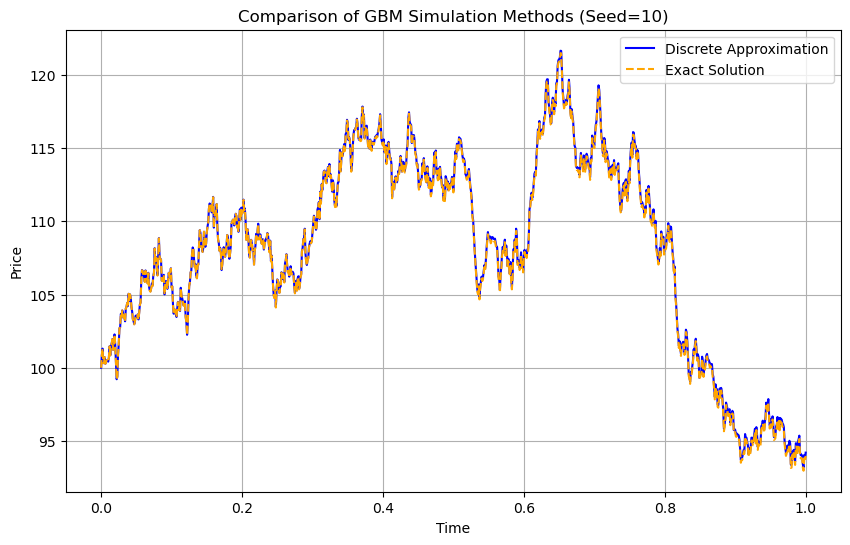

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_apr, label="Discrete Approximation", color='blue')
plt.plot(t, S_exact, label="Exact Solution", color='orange', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Comparison of GBM Simulation Methods (Seed=10)")
plt.legend()
plt.grid(True)
plt.show()
